### Introduction

Matplotlib's figure and axes Object-Oriented approach allows for more control over charts. Most advanced plotting demos will be done this way.

OO Matplotlib deals with a figure, which can be thought of as a drawing canvas with one or more axes (or plots) embedded in it. Both figures and axes have properties that can be independently specified. In comparison, the interactive pyplot route just plots to a single axis of a global figure.

In [9]:
import matplotlib.pyplot as plt

# Create a figure using pyplot's figure method
fig = plt.figure(figsize=(8, 4),
                 dpi=200,
                 tight_layout=True,
                 linewidth=1, edgecolor='r'
                )

<Figure size 1600x800 with 0 Axes>

Figures share a subset of properties with the pyplot module. These can be set on creation of the figure or through similar methods (i.e., fig.text() as opposed to plt.fig_text()).

Each figure can have multiple axes, each of which is analogous to the single, global plot state but with the advantage that multiple axes can exist in one figure, each with independent properties.

### Axes and Subplots

The figure.add_axes method allows precise control over the position of axes within a figure (e.g., enabling you to embed a smaller plot within the main). Positioning of plot elements uses a 0 → 1 coordinate system, where 1 is the width or height of the figure. You can specify the position using a four-element list or tuple to set bottom-left and top-right bounds:

In [10]:
# h = height, w = width
# bottom(h*0.2), left(w* 0.2), top(h*0.8), right(w*0.8)
fig.add_axes([0.2, 0.2,
              0.8, 0.8])


<Axes: >

Inserting smaller axes into larger ones, using random test data:

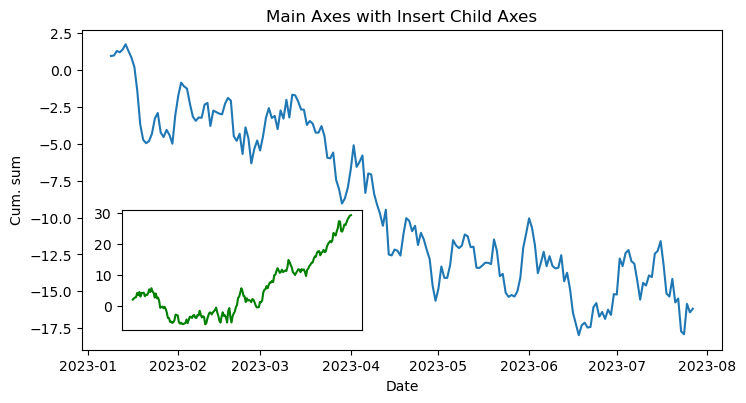

In [17]:
import pandas as pd
from datetime import datetime
import numpy as np

x = pd.period_range(datetime.now(), periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(200, 3).cumsum(0)

fig = plt.figure(figsize=(8,4))

# --- Main Axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('Main Axes with Insert Child Axes')
# Selects first column of random NumPy y-data
ax.plot(x, y[:,0])
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')

# --- Inserted Axes
ax = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax.plot(x, y[:,1], color='g') # 'g' for green
# Removes x ticks and labels from embedded plot
ax.set_xticks([]); 

Calling subplots without arguments returns a figure with single axes, similar to pyplot. The below produces the same chart as in the pyplot demo:

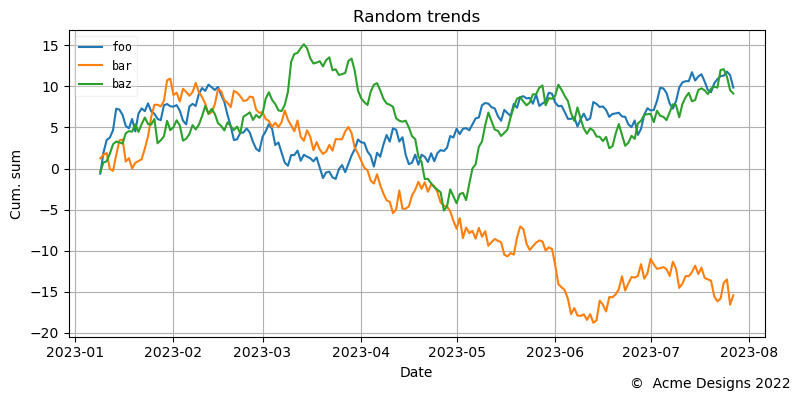

In [19]:
figure, ax = plt.subplots()
plots = ax.plot(x, y, label='')
figure.set_size_inches(8, 4)
ax.legend(plots, ('foo', 'bar', 'baz'), loc='best', framealpha=0.25,
          prop={'size':'small', 'family':'monospace'})
ax.set_title('Random trends')
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
ax.grid(True)
figure.text(0.995, 0.01, '©  Acme Designs 2022',
            ha='right', va='bottom')
figure.tight_layout()

Calling subplots with arguments for number of rows (nrows) and columns (ncols) allows multiple plots to be placed on a grid layout. The call to subplots returns the figure and an array of axes, in row-column order. In the example, we specify one column so axes is a single array of three stacked axes.

Text(0.5, 0, 'Date')

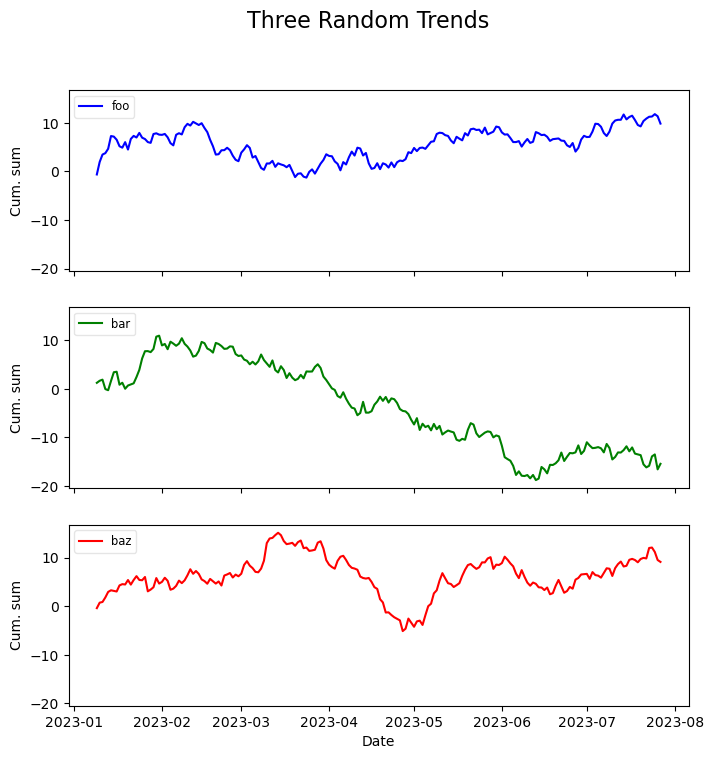

In [20]:
fig, axes = plt.subplots(
    # Specifies subplot grid of three rows by one column
    nrows=3, ncols=1, 
    # Share x and y axes automatically adjusting limits for easy comparison
    sharex=True, sharey=True, 
    figsize=(8, 8))

# Switch y to row-column and zip the line data, labels, and line colors together
labelled_data = zip(y.transpose(), ('foo', 'bar', 'baz'), ('b', 'g', 'r'))
fig.suptitle('Three Random Trends', fontsize=16)

# enumerate is used to supply an index which we use to select an axis by row
# using zipped labelled_data to provide plot properties
for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5,
              prop={'size':'small'})
    
# Labels the last of the shared x-axes
axes[-1].set_xlabel('Date') 

Python's zip method produces three dictionaries with line data. zip takes lists or tuples of length n and returns n lists, formed by matching the elements by order.

In [24]:
letters = ['a', 'b']
numbers = [1, 2]
zip(letters, numbers)

# out: [('a', 1), ('b', 2)]